# Análise de Risco no Transporte Público

#### A análise a seguir busca responder algumas questões sobre incidentes no trânsito e como tais situações estão interligadas entre si. Questões como: Quais incidentes de trânsito ocorrem com mais frequência? Qual a faixa etária que mais se envolve em incidentes de trânsito? Qual o evento mais comum nos incidentes? Passageiros ou pedestres são as maiores vítimas dos incidentes?

### 1. Dataset

#### O dataset estudado está disponível em: https://data.world/makeovermonday/2018w51 e traz dados sobre incidentes de trânsito na cidade de Londres - Reino Unido

In [1]:
### Carregando as biliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler

#### 1.1 Carregando o dataset

In [2]:
## Carregando o dataset
dataset_original = pd.read_excel("acidentes.xlsx")

## Visualizando a dataset carregado
dataset_original.head()

,Year,Date Of Incident,Route,Operator,Group Name,Bus Garage,Borough,Injury Result Description,Incident Event Type,Victim Category,Victims Sex,Victims Age
0,2015,2015-01-01,1,London General,Go-Ahead,Garage Not Available,Southwark,Injuries treated on scene,Onboard Injuries,Passenger,Male,Child
1,2015,2015-01-01,4,Metroline,Metroline,Garage Not Available,Islington,Injuries treated on scene,Onboard Injuries,Passenger,Male,Unknown
2,2015,2015-01-01,5,East London,Stagecoach,Garage Not Available,Havering,Taken to Hospital – Reported Serious Injury or...,Onboard Injuries,Passenger,Male,Elderly
3,2015,2015-01-01,5,East London,Stagecoach,Garage Not Available,None London Borough,Taken to Hospital – Reported Serious Injury or...,Onboard Injuries,Passenger,Male,Elderly
4,2015,2015-01-01,6,Metroline,Metroline,Garage Not Available,Westminster,Reported Minor Injury - Treated at Hospital,Onboard Injuries,Pedestrian,Female,Elderly


#### 1.2 Ajustando dataset

##### 1.2.1 Criando uma cópia do dataset_original

In [3]:
dataset = dataset_original.copy()

dataset.head()

,Year,Date Of Incident,Route,Operator,Group Name,Bus Garage,Borough,Injury Result Description,Incident Event Type,Victim Category,Victims Sex,Victims Age
0,2015,2015-01-01,1,London General,Go-Ahead,Garage Not Available,Southwark,Injuries treated on scene,Onboard Injuries,Passenger,Male,Child
1,2015,2015-01-01,4,Metroline,Metroline,Garage Not Available,Islington,Injuries treated on scene,Onboard Injuries,Passenger,Male,Unknown
2,2015,2015-01-01,5,East London,Stagecoach,Garage Not Available,Havering,Taken to Hospital – Reported Serious Injury or...,Onboard Injuries,Passenger,Male,Elderly
3,2015,2015-01-01,5,East London,Stagecoach,Garage Not Available,None London Borough,Taken to Hospital – Reported Serious Injury or...,Onboard Injuries,Passenger,Male,Elderly
4,2015,2015-01-01,6,Metroline,Metroline,Garage Not Available,Westminster,Reported Minor Injury - Treated at Hospital,Onboard Injuries,Pedestrian,Female,Elderly


In [4]:
# Contando quantidade de registros
quantidade_registros_original = dataset['Year'].count()
quantidade_registros_original

23158

##### 1.2.2 Removendo dados desconhecidos

In [5]:
dataset.isna().sum()

Year                         0
Date Of Incident             0
Route                        0
Operator                     0
Group Name                   0
Bus Garage                   0
Borough                      0
Injury Result Description    0
Incident Event Type          0
Victim Category              0
Victims Sex                  0
Victims Age                  0
dtype: int64

In [6]:
# Localizar valores Unknown
for column in dataset:
    resultado = dataset.loc[dataset[column] == 'Unknown']
    if not resultado.empty:
        print(column)
    resultado = ''  # Reinicializar o DataFrame
    continue

Victims Sex
Victims Age


    • Conforme acima, não há valores 'na' no dataset. Mas há valores desconhecidos (Unknown) nas colunas [Victims Sex, Victims Age] e para seguir com as análises esses valores serão desconsiderados, apenas por motivos de escolha. É plenamente possível fazer estudos/análises com a variável 'Unknown', mas para entender apenas os dados que estão explícitos, seguiremos sem essa variável.

In [7]:
# Alterando valores Unknown para NAN
dataset = dataset.replace('Unknown',np.nan)
dataset.head()

,Year,Date Of Incident,Route,Operator,Group Name,Bus Garage,Borough,Injury Result Description,Incident Event Type,Victim Category,Victims Sex,Victims Age
0,2015,2015-01-01,1,London General,Go-Ahead,Garage Not Available,Southwark,Injuries treated on scene,Onboard Injuries,Passenger,Male,Child
1,2015,2015-01-01,4,Metroline,Metroline,Garage Not Available,Islington,Injuries treated on scene,Onboard Injuries,Passenger,Male,NaN
2,2015,2015-01-01,5,East London,Stagecoach,Garage Not Available,Havering,Taken to Hospital – Reported Serious Injury or...,Onboard Injuries,Passenger,Male,Elderly
3,2015,2015-01-01,5,East London,Stagecoach,Garage Not Available,None London Borough,Taken to Hospital – Reported Serious Injury or...,Onboard Injuries,Passenger,Male,Elderly
4,2015,2015-01-01,6,Metroline,Metroline,Garage Not Available,Westminster,Reported Minor Injury - Treated at Hospital,Onboard Injuries,Pedestrian,Female,Elderly


In [8]:
# Removendo do dataset valores desconhecidos
dataset = dataset.dropna()
dataset.head()

,Year,Date Of Incident,Route,Operator,Group Name,Bus Garage,Borough,Injury Result Description,Incident Event Type,Victim Category,Victims Sex,Victims Age
0,2015,2015-01-01,1,London General,Go-Ahead,Garage Not Available,Southwark,Injuries treated on scene,Onboard Injuries,Passenger,Male,Child
2,2015,2015-01-01,5,East London,Stagecoach,Garage Not Available,Havering,Taken to Hospital – Reported Serious Injury or...,Onboard Injuries,Passenger,Male,Elderly
3,2015,2015-01-01,5,East London,Stagecoach,Garage Not Available,None London Borough,Taken to Hospital – Reported Serious Injury or...,Onboard Injuries,Passenger,Male,Elderly
4,2015,2015-01-01,6,Metroline,Metroline,Garage Not Available,Westminster,Reported Minor Injury - Treated at Hospital,Onboard Injuries,Pedestrian,Female,Elderly
5,2015,2015-01-01,6,Metroline,Metroline,Garage Not Available,Westminster,Taken to Hospital – Reported Serious Injury or...,Onboard Injuries,Passenger,Female,Elderly


In [9]:
quantidade_registros_alterado = dataset['Year'].count()
quantidade_registros_alterado

15312

In [10]:
porcentagem = (100 * (quantidade_registros_original - quantidade_registros_alterado)) / quantidade_registros_original
porcentagem

33.880300544088435

In [29]:
# Renomeando as colunas do dataset
dataset.rename(columns={'Year': 'Ano',
                        'Date Of Incident': 'Data do incidente', 
                        'Route': 'Rota', 
                        'Operator': 'Operador',
                        'Group Name': 'Grupo',
                        'Bus Garage': 'Garagem',
                        'Borough': 'Bairro',
                        'Injury Result Description': 'Descrição da lesão',
                        'Incident Event Type': 'Tipo',
                        'Victim Category': 'Categoria da vítima',
                        'Victims Sex': 'Gênero da vítima',
                        'Victims Age': 'Idade da vítima'
                       }, inplace=True)

dataset.head()

,Ano,Data do incidente,Rota,Operador,Grupo,Garagem,Bairro,Descrição da lesão,Tipo,Categoria da vítima,Gênero da vítima,Idade da vítima,Genero,Month
0,2015,2015-01-01,1,London General,Go-Ahead,Garage Not Available,Southwark,Injuries treated on scene,Onboard Injuries,Passenger,Male,Child,1,1
2,2015,2015-01-01,5,East London,Stagecoach,Garage Not Available,Havering,Taken to Hospital – Reported Serious Injury or...,Onboard Injuries,Passenger,Male,Elderly,1,1
3,2015,2015-01-01,5,East London,Stagecoach,Garage Not Available,None London Borough,Taken to Hospital – Reported Serious Injury or...,Onboard Injuries,Passenger,Male,Elderly,1,1
4,2015,2015-01-01,6,Metroline,Metroline,Garage Not Available,Westminster,Reported Minor Injury - Treated at Hospital,Onboard Injuries,Pedestrian,Female,Elderly,0,1
5,2015,2015-01-01,6,Metroline,Metroline,Garage Not Available,Westminster,Taken to Hospital – Reported Serious Injury or...,Onboard Injuries,Passenger,Female,Elderly,0,1


    • O resultado de 33% representa a quantidade de registros que serão desconsiderados para a continuidade do estudo, ou seja,  do total de registros, 77% tem gênero e idade conhecidas. Desconsiderar 1/3 dos dados pode parecer alto, mas tudo depende de como esses dados foram coletados e como o estudo irá seguir. 

    • A seguir serão respondidas 10 questões sobre o estudo

### 1. Qual a quantidade de incidentes por gênero?

##### Agora com a pergunta, fica mais claro entender o motivo de ter desconsiderado os valores 'Unknown' da coluna [Victims Sex], pois não é possível assegurar qual o gênero da vítima nesses dados. 

##### 1.1 Treinando a coluna "Victims Age" (Label Encoding).

In [11]:
# Variável categórica nominal
dataset["Victims Sex"].value_counts()

# Cria o objeto encoder
le = LabelEncoder()

# Treina o objeto
le.fit(dataset["Victims Sex"])

list(le.classes_)

# Aplicamos o objeto encoder treinado 
dataset["Genero"] = le.transform(dataset["Victims Sex"])

In [12]:
dataset["Victims Sex"].value_counts()

Female    9090
Male      6222
Name: Victims Sex, dtype: int64

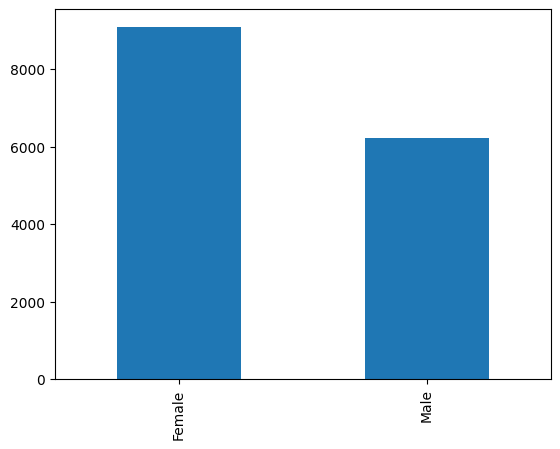

In [13]:
# Gerar o gráfico de barras
dataset['Victims Sex'].value_counts().plot(kind='bar')

# Exibir o gráfico
plt.show()

2- Qual faixa etária esteve mais envolvida nos incidentes?

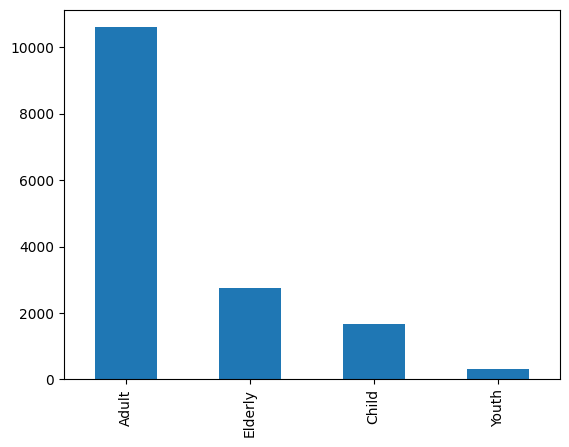

In [18]:
# Renomear as colunas desejadas primeiro
dataset.rename(columns={'Adult': 'Adulto', 'Elderly': 'Idoso', 'Child': 'Criança', 'Youth': 'Jovem'}, inplace=True)

# Gerar o gráfico de barras para 'Victims Age'
dataset['Victims Age'].value_counts().plot(kind='bar')

# Exibir o gráfico
plt.show()

3 - Qual o percentual de incidentes por tipo de evento (Incident Event Type)?

In [19]:
dataset['Incident Event Type']

0        Onboard Injuries
2        Onboard Injuries
3        Onboard Injuries
4        Onboard Injuries
5        Onboard Injuries
               ...       
23152      Slip Trip Fall
23153     Personal Injury
23154     Personal Injury
23155      Slip Trip Fall
23156     Personal Injury
Name: Incident Event Type, Length: 15312, dtype: object

In [21]:
# Contar a ocorrência de cada tipo de evento
incidentes = dataset['Incident Event Type'].value_counts()

# Calcular o total de incidentes
total_incidentes = len(dataset)

# Calcular o percentual de cada tipo de evento
percentagens = (incidentes / total_incidentes) * 100

# Exibir os percentuais
print(percentagens)

Slip Trip Fall             32.405956
Onboard Injuries           25.600836
Personal Injury            19.128788
Collision Incident         18.273250
Assault                     3.330721
Activity Incident Event     0.548589
Vandalism Hooliganism       0.359195
Safety Critical Failure     0.313480
Fire                        0.019592
Robbery                     0.019592
Name: Incident Event Type, dtype: float64


4 - Como foi a evolução de incidentes por mês ao longo do tempo?

<Axes: >

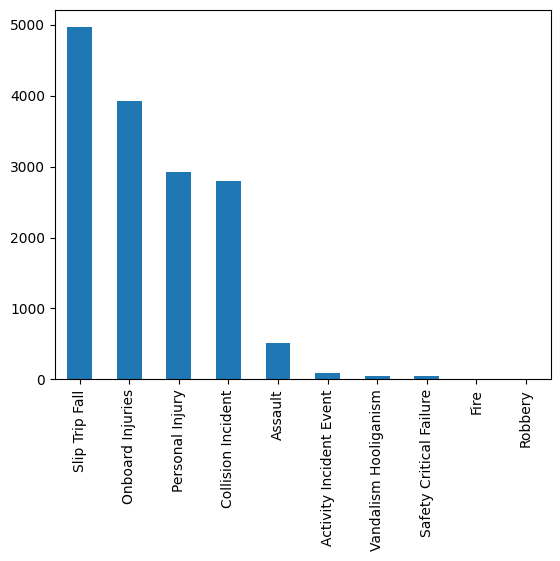

In [23]:
dataset['Incident Event Type'].value_counts().plot(kind='bar')

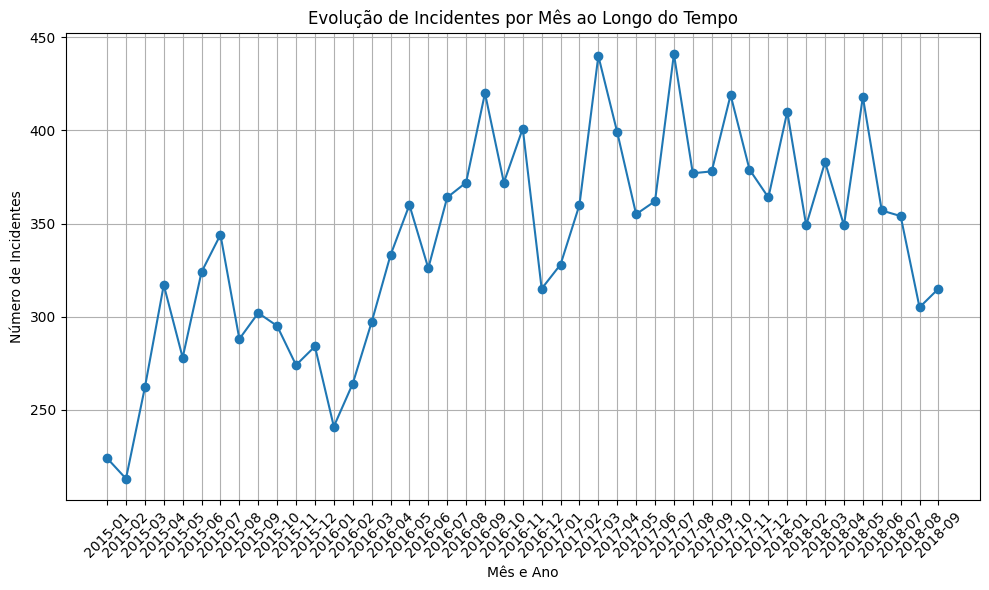

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Certifique-se de que a coluna de data está em formato de data e hora
dataset['Date Of Incident'] = pd.to_datetime(dataset['Date Of Incident'])

# Extrair o mês e o ano de cada data
dataset['Year'] = dataset['Date Of Incident'].dt.year
dataset['Month'] = dataset['Date Of Incident'].dt.month

# Agregar os dados por mês e contar o número de incidentes
monthly_incidents = dataset.groupby(['Year', 'Month']).size().reset_index(name='Incidents')

# Criar um gráfico de linha para visualizar a evolução ao longo do tempo
plt.figure(figsize=(10, 6))
plt.plot(monthly_incidents['Year'].astype(str) + '-' + monthly_incidents['Month'].astype(str).str.zfill(2), monthly_incidents['Incidents'], marker='o', linestyle='-')
plt.xlabel('Mês e Ano')
plt.ylabel('Número de Incidentes')
plt.title('Evolução de Incidentes por Mês ao Longo do Tempo')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [26]:
dataset.dtypes

Year                                  int64
Date Of Incident             datetime64[ns]
Route                                object
Operator                             object
Group Name                           object
Bus Garage                           object
Borough                              object
Injury Result Description            object
Incident Event Type                  object
Victim Category                      object
Victims Sex                          object
Victims Age                          object
Genero                                int32
dtype: object